In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('/Users/busebahadir/Desktop/A:B Testing/digital_marketing_dataset.csv')

In [3]:
data.head()

,UserID,Group,Age,Gender,Location,Device,PageViews,ClickThroughRate,SessionDuration,FrequencyOfVisits,...,Purchases,FormSubmissions,NetPromoterScore,MostActiveTimeOfDay,ContentConsumed,UserJourneyPathway,FeatureInteraction,LayoutVariation,ColorScheme,CTAButton
0,1,Test,62,Female,North America,Tablet,4,0.731815,7.448806,3,...,0,0,6,Morning,Lifestyle,Ad Click,None,Layout 1,Scheme 1,Button A
1,2,Test,65,Female,Europe,Mobile,7,0.811036,4.455856,4,...,0,0,-2,Night,Entertainment,Homepage,Feature A,Layout 1,Scheme 1,Button A
2,3,Test,18,Female,Europe,Desktop,5,0.176856,4.816883,6,...,0,1,-6,Morning,Entertainment,Direct,None,Layout 1,Scheme 1,Button A
3,4,Test,21,Female,North America,Tablet,11,0.905315,3.772111,1,...,0,0,0,Night,Educational,Direct,Feature B,Layout 1,Scheme 1,Button A
4,5,Test,21,Other,North America,Tablet,4,0.428069,10.471592,5,...,0,0,-9,Afternoon,Lifestyle,Homepage,None,Layout 1,Scheme 1,Button A


In [4]:
data.groupby('Group')[['UserID']].count()

,UserID
Group,
Control,1500
Test,1500


In [5]:
device_type = data['Device'].value_counts()

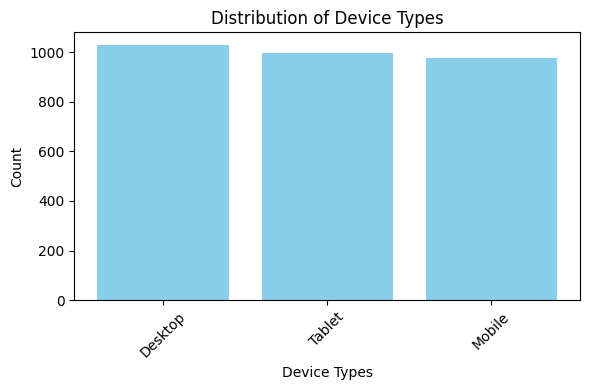

In [6]:
plt.figure(figsize=(6, 4))
plt.bar(device_type.index, device_type.values, color='skyblue')
plt.xlabel('Device Types')
plt.ylabel('Count')
plt.title('Distribution of Device Types')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [7]:
data['Turnover_Score'] = data['SignUps'] + data['Downloads'] + data['FormSubmissions']+ data['Purchases']

In [8]:
data.groupby('Device')[['Turnover_Score']].mean()

,Turnover_Score
Device,
Desktop,1.007782
Mobile,0.987705
Tablet,1.017068


In [9]:
data.groupby('ContentConsumed')[['Turnover_Score']].mean()

,Turnover_Score
ContentConsumed,
Educational,1.035433
Entertainment,1.010485
Lifestyle,0.993351
News,0.976487


In [10]:
data.groupby('UserJourneyPathway')[['Turnover_Score']].mean()

,Turnover_Score
UserJourneyPathway,
Ad Click,0.978378
Direct,1.035620
Homepage,1.004011
Search,0.998674


In [11]:
data.groupby('Group').agg({"UserID":"count", "PageViews":"mean","ClickThroughRate":"mean", "SignUps":"sum", "Downloads":"sum", "FormSubmissions":"sum", "Purchases":"sum"})

,UserID,PageViews,ClickThroughRate,SignUps,Downloads,FormSubmissions,Purchases
Group,,,,,,,
Control,1500,4.955333,0.494293,444,321,580,152
Test,1500,4.911333,0.503663,464,290,603,159
